In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from IPython.display import display       

In [2]:
df = pd.read_csv('diabetic_data.csv')       # leer el csv desde el directorio de trabajo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.rename(columns = {"encounter_id": "ID_encuentro", "patient_nbr":"N_paciente", "race":"Raza", "gender":"Genero", "age":"Edad", "weight":"Peso", "admission_type_id": "ID_tipo_admision",
                                "discharge_disposition_id":"ID_alta", "admission_source_id":"ID_fuente_admision", "time_in_hospital":"Tiempo_hospitalizacion", "payer_code":"Codigo_pagador",
                                "medical_specialty":"Especialidad_medica", "num_lab_procedures":"N_procedimientos_lab", "num_procedures":"N_procedimientos", "num_medications":"N_medicamentos",
                                "number_outpatient":"N_ambulatorio", "number_emergency":"N_urgencia", "number_inpatient":"N_hospitalizacion", "diag_1": "Diag_principal", "diag_2":"Diag_sec",
                                "diag_3": "Diag_sec_ad", "number_diagnoses":"N_diagnosticos", "max_glu_serum":"Glicemia_max", "A1Cresult":"Hemo_glic_res", "metformin":"Metformina", "repaglinide":"Repaglinida",
                                "nateglinide":"Nateglinida", "chlorpropamide": "Clorpropamida", "glimepiride":"Glimepirida", "acetohexamide":"Acetohexamida", "glipizide": "Glipizida", "glyburide":"Gliburida",
                                "tolbutamide":"Tolbutamida", "pioglitazone":"Pioglitazona", "rosiglitazone":"Rosiglitazona", "acarbose":"Acarbosa", "miglitol":"Miglitol", "troglitazone":"Troglitazona", "tolazamide":"Tolazamida",
                                "examide":"Torasemida", "citoglipton":"Citoglipton", "insulin":"Insulina", "glyburide-metformin":"Gliburida_metformina", "glipizide-metformin":"Glipizida_metformina","glimepiride-pioglitazone":"Glimepirida_pioglitazona",
                                "metformin-rosiglitazone":"Metformina_rosiglitazona", "metformin-pioglitazone":"Metformina_pioglitazona", "change":"Cambio", "diabetesMed":"Med_diabetes", "readmitted":"Reingresado"}, inplace=True)

In [8]:
df

,ID_encuentro,N_paciente,Raza,Genero,Edad,Peso,ID_tipo_admision,ID_alta,ID_fuente_admision,Tiempo_hospitalizacion,...,Citoglipton,Insulina,Gliburida_metformina,Glipizida_metformina,Glimepirida_pioglitazona,Metformina_rosiglitazona,Metformina_pioglitazona,Cambio,Med_diabetes,Reingresado
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.Reingresado

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: Reingresado, Length: 101766, dtype: object

In [10]:
df.describe()

,ID_encuentro,N_paciente,ID_tipo_admision,ID_alta,ID_fuente_admision,Tiempo_hospitalizacion,N_procedimientos_lab,N_procedimientos,N_medicamentos,N_ambulatorio,N_urgencia,N_hospitalizacion,N_diagnosticos
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
df.describe(include = object)

,Raza,Genero,Edad,Peso,Codigo_pagador,Especialidad_medica,Diag_principal,Diag_sec,Diag_sec_ad,Glicemia_max,...,Citoglipton,Insulina,Gliburida_metformina,Glipizida_metformina,Glimepirida_pioglitazona,Metformina_rosiglitazona,Metformina_pioglitazona,Cambio,Med_diabetes,Reingresado
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [12]:
df.columns

Index(['ID_encuentro', 'N_paciente', 'Raza', 'Genero', 'Edad', 'Peso',
       'ID_tipo_admision', 'ID_alta', 'ID_fuente_admision',
       'Tiempo_hospitalizacion', 'Codigo_pagador', 'Especialidad_medica',
       'N_procedimientos_lab', 'N_procedimientos', 'N_medicamentos',
       'N_ambulatorio', 'N_urgencia', 'N_hospitalizacion', 'Diag_principal',
       'Diag_sec', 'Diag_sec_ad', 'N_diagnosticos', 'Glicemia_max',
       'Hemo_glic_res', 'Metformina', 'Repaglinida', 'Nateglinida',
       'Clorpropamida', 'Glimepirida', 'Acetohexamida', 'Glipizida',
       'Gliburida', 'Tolbutamida', 'Pioglitazona', 'Rosiglitazona', 'Acarbosa',
       'Miglitol', 'Troglitazona', 'Tolazamida', 'Torasemida', 'Citoglipton',
       'Insulina', 'Gliburida_metformina', 'Glipizida_metformina',
       'Glimepirida_pioglitazona', 'Metformina_rosiglitazona',
       'Metformina_pioglitazona', 'Cambio', 'Med_diabetes', 'Reingresado'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
for (label, content) in df.iteritems():
    print('Valores únicos en la columna', label,':',  df[label].nunique())
    print(label,':',  df[label].unique())
    print(df[label].value_counts())
    print('-'*100)


<ipython-input-14-31a2acdd0f6c>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in df.iteritems(): # solo se ocupará el label (nombre de la columna)


Valores únicos en la columna ID_encuentro : 101766
ID_encuentro : [  2278392    149190     64410 ... 443854148 443857166 443867222]
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: ID_encuentro, Length: 101766, dtype: int64
----------------------------------------------------------------------------------------------------
Valores únicos en la columna N_paciente : 71518
N_paciente : [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: N_paciente, Length: 71518, dtype: int64
----------------------------------------------------------------------------------------------------
Valores únicos en la columna Raza : 6
Raza : ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispan

In [21]:
df.groupby([df["N_paciente"], 'Reingresado']).count()

ID_encuentro  Raza  Genero  Edad  Peso  \
N_paciente Reingresado                                           
135        <30                     1     1       1     1     0   
           >30                     1     1       1     1     0   
378        NO                      1     1       1     1     0   
729        NO                      1     1       1     1     0   
774        NO                      1     1       1     1     0   
...                              ...   ...     ...   ...   ...   
189351095  NO                      1     1       1     1     0   
189365864  NO                      1     1       1     1     0   
189445127  NO                      1     1       1     1     0   
189481478  >30                     1     1       1     1     0   
189502619  NO                      1     1       1     1     0   

                        ID_tipo_admision  ID_alta  ID_fuente_admision  \
N_paciente Reingresado                                                  
135        <30                         1        1                   1   
           >30                         1        1                   1   
378        NO                          1        1                   1   
729        NO                          1        1                   1   
774        NO                          1        1                   1   
...                                  ...      ...                 ...   
189351095  NO                          1        1                   1   
189365864  NO                          1        1                   1   
189445127  NO                          1        1                   1   
189481478  >30                         1        1                   1   
189502619  NO                          1        1                   1   

                        Tiempo_hospitalizacion  Codigo_pagador  ...  \
N_paciente Reingresado                                          ...   
135        <30                               1               0  ...   
           >30                               1               0  ...   
378        NO                                1               0  ...   
729        NO                                1               1  ...   
774        NO                                1               0  ...   
...                                        ...             ...  ...   
189351095  NO                                1               0  ...   
189365864  NO                                1               1  ...   
189445127  NO                                1               0  ...   
189481478  >30                               1               1  ...   
189502619  NO                                1               1  ...   

                        Torasemida  Citoglipton  Insulina  \
N_paciente Reingresado                                      
135        <30                   1            1         1   
           >30                   1            1         1   
378        NO                    1            1         1   
729        NO                    1            1         1   
774        NO                    1            1         1   
...                            ...          ...       ...   
189351095  NO                    1            1         1   
189365864  NO                    1            1         1   
189445127  NO                    1            1         1   
189481478  >30                   1            1         1   
189502619  NO                    1            1         1   

                        Gliburida_metformina  Glipizida_metformina  \
N_paciente Reingresado                                               
135        <30                             1                     1   
           >30                             1                     1   
378        NO                              1                     1   
729        NO                              1                     1   
774        NO                              1                     1   
...    

In [22]:
df.columns

Index(['ID_encuentro', 'N_paciente', 'Raza', 'Genero', 'Edad', 'Peso',
       'ID_tipo_admision', 'ID_alta', 'ID_fuente_admision',
       'Tiempo_hospitalizacion', 'Codigo_pagador', 'Especialidad_medica',
       'N_procedimientos_lab', 'N_procedimientos', 'N_medicamentos',
       'N_ambulatorio', 'N_urgencia', 'N_hospitalizacion', 'Diag_principal',
       'Diag_sec', 'Diag_sec_ad', 'N_diagnosticos', 'Glicemia_max',
       'Hemo_glic_res', 'Metformina', 'Repaglinida', 'Nateglinida',
       'Clorpropamida', 'Glimepirida', 'Acetohexamida', 'Glipizida',
       'Gliburida', 'Tolbutamida', 'Pioglitazona', 'Rosiglitazona', 'Acarbosa',
       'Miglitol', 'Troglitazona', 'Tolazamida', 'Torasemida', 'Citoglipton',
       'Insulina', 'Gliburida_metformina', 'Glipizida_metformina',
       'Glimepirida_pioglitazona', 'Metformina_rosiglitazona',
       'Metformina_pioglitazona', 'Cambio', 'Med_diabetes', 'Reingresado'],
      dtype='object')

In [23]:
# Reemplazo de columnas con string '?' por NAN
df = df.replace('?', np.nan)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID_encuentro              101766 non-null  int64 
 1   N_paciente                101766 non-null  int64 
 2   Raza                      99493 non-null   object
 3   Genero                    101766 non-null  object
 4   Edad                      101766 non-null  object
 5   Peso                      3197 non-null    object
 6   ID_tipo_admision          101766 non-null  int64 
 7   ID_alta                   101766 non-null  int64 
 8   ID_fuente_admision        101766 non-null  int64 
 9   Tiempo_hospitalizacion    101766 non-null  int64 
 10  Codigo_pagador            61510 non-null   object
 11  Especialidad_medica       51817 non-null   object
 12  N_procedimientos_lab      101766 non-null  int64 
 13  N_procedimientos          101766 non-null  int64 
 14  N_me

In [25]:
df.isna().sum()

ID_encuentro                    0
N_paciente                      0
Raza                         2273
Genero                          0
Edad                            0
Peso                        98569
ID_tipo_admision                0
ID_alta                         0
ID_fuente_admision              0
Tiempo_hospitalizacion          0
Codigo_pagador              40256
Especialidad_medica         49949
N_procedimientos_lab            0
N_procedimientos                0
N_medicamentos                  0
N_ambulatorio                   0
N_urgencia                      0
N_hospitalizacion               0
Diag_principal                 21
Diag_sec                      358
Diag_sec_ad                  1423
N_diagnosticos                  0
Glicemia_max                    0
Hemo_glic_res                   0
Metformina                      0
Repaglinida                     0
Nateglinida                     0
Clorpropamida                   0
Glimepirida                     0
Acetohexamida 

In [26]:
df.isnull().mean() * 100

ID_encuentro                 0.000000
N_paciente                   0.000000
Raza                         2.233555
Genero                       0.000000
Edad                         0.000000
Peso                        96.858479
ID_tipo_admision             0.000000
ID_alta                      0.000000
ID_fuente_admision           0.000000
Tiempo_hospitalizacion       0.000000
Codigo_pagador              39.557416
Especialidad_medica         49.082208
N_procedimientos_lab         0.000000
N_procedimientos             0.000000
N_medicamentos               0.000000
N_ambulatorio                0.000000
N_urgencia                   0.000000
N_hospitalizacion            0.000000
Diag_principal               0.020636
Diag_sec                     0.351787
Diag_sec_ad                  1.398306
N_diagnosticos               0.000000
Glicemia_max                 0.000000
Hemo_glic_res                0.000000
Metformina                   0.000000
Repaglinida                  0.000000
Nateglinida 

In [27]:
# Reemplazar columnas con NaN por string "faltante"
df = df.replace(np.nan, 'Faltante')

In [28]:
# Dataframe sin columnas que no aportan información
df_SinColumnas = df.drop(columns = ['ID_encuentro', 'N_paciente', 'Peso', 'Codigo_pagador'])

In [29]:
df_SinColumnas = df_SinColumnas.drop(columns = ['Clorpropamida', 'Acetohexamida', 'Tolbutamida', 'Acarbosa', 'Miglitol', 'Troglitazona', 'Tolazamida', 'Torasemida', 'Citoglipton', 'Gliburida_metformina', 'Glipizida_metformina', 'Glimepirida_pioglitazona', 'Metformina_rosiglitazona', 'Metformina_pioglitazona'])

In [32]:
# Eliminación filas de alta en un hospicio o muerte del paciente (evitar sesgo de resultados)
df_SinColumnas_SinFilas = df_SinColumnas[(df_SinColumnas.ID_alta != 11) & (df_SinColumnas.ID_alta != 13) & (df_SinColumnas.ID_alta != 14) & (df_SinColumnas.ID_alta != 19) & (df_SinColumnas.ID_alta != 20)]

In [33]:
df_SinColumnas_SinFilas.shape

(99343, 32)

In [34]:
df_SinColumnas_SinFilas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Raza                    99343 non-null  object
 1   Genero                  99343 non-null  object
 2   Edad                    99343 non-null  object
 3   ID_tipo_admision        99343 non-null  int64 
 4   ID_alta                 99343 non-null  int64 
 5   ID_fuente_admision      99343 non-null  int64 
 6   Tiempo_hospitalizacion  99343 non-null  int64 
 7   Especialidad_medica     99343 non-null  object
 8   N_procedimientos_lab    99343 non-null  int64 
 9   N_procedimientos        99343 non-null  int64 
 10  N_medicamentos          99343 non-null  int64 
 11  N_ambulatorio           99343 non-null  int64 
 12  N_urgencia              99343 non-null  int64 
 13  N_hospitalizacion       99343 non-null  int64 
 14  Diag_principal          99343 non-null  object
 15  D

<ipython-input-35-1b2c0b3a1884>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in df_SinColumnas_SinFilas.iteritems():
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


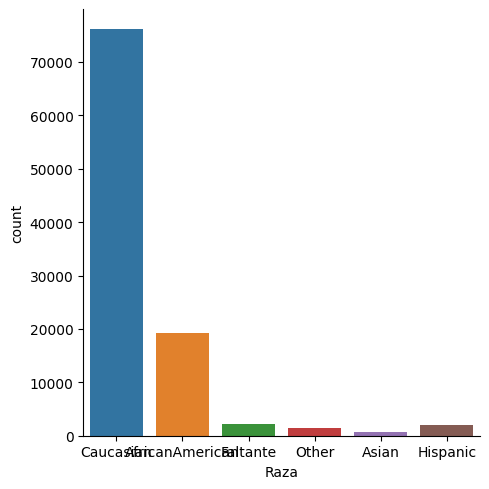

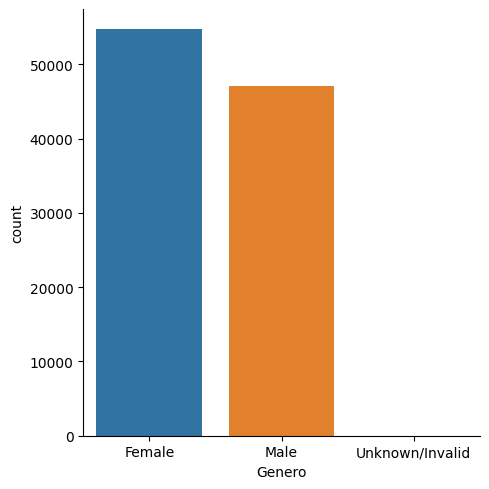

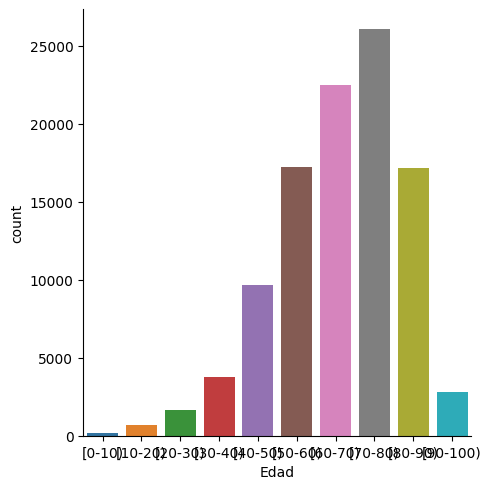

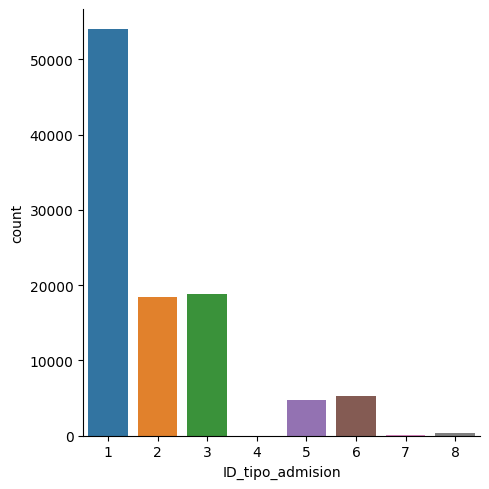

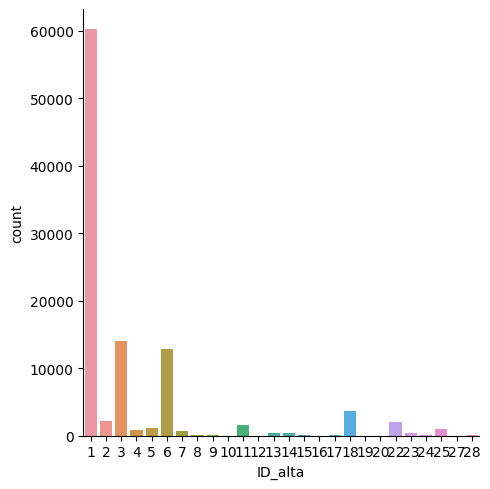

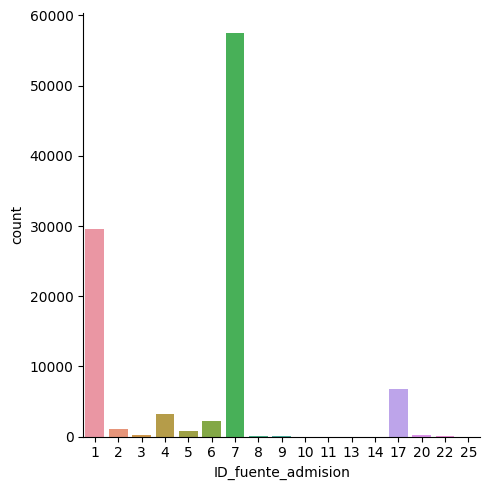

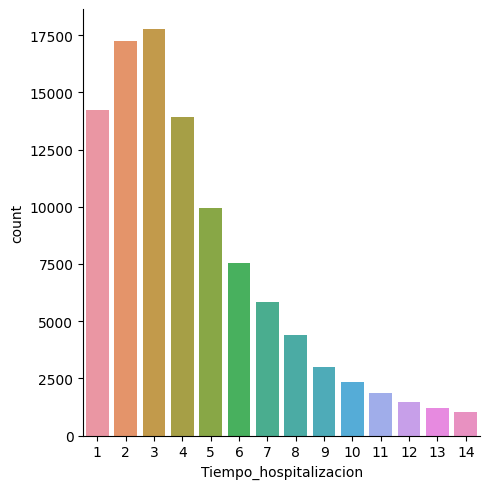

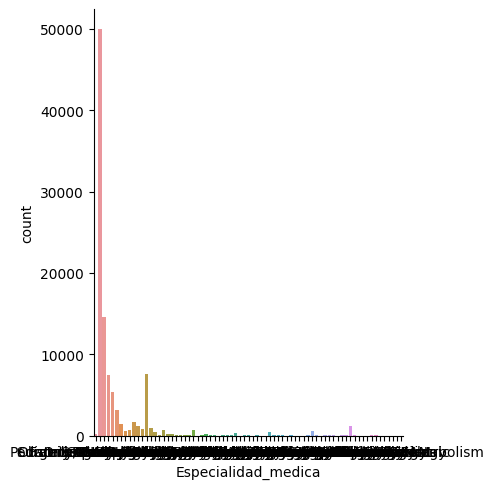

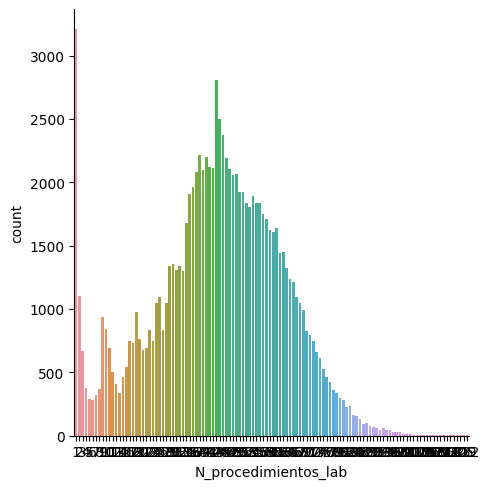

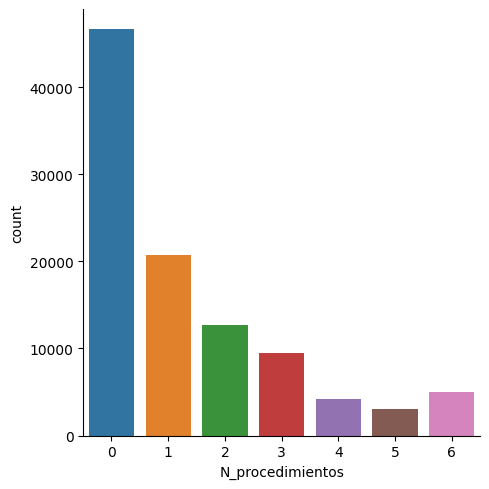

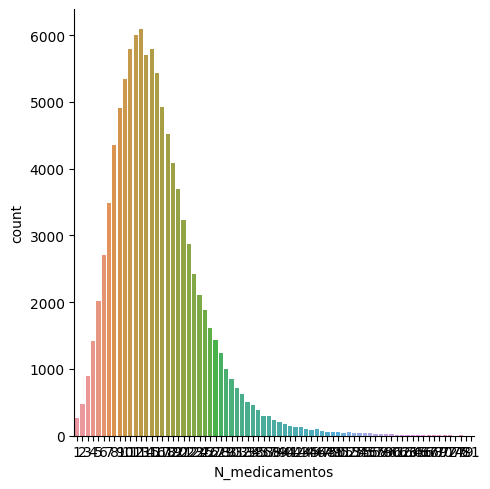

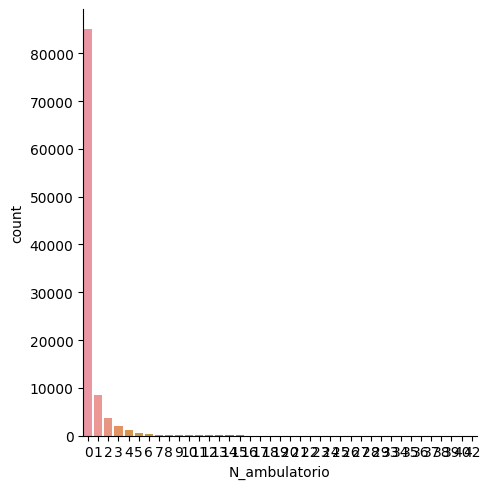

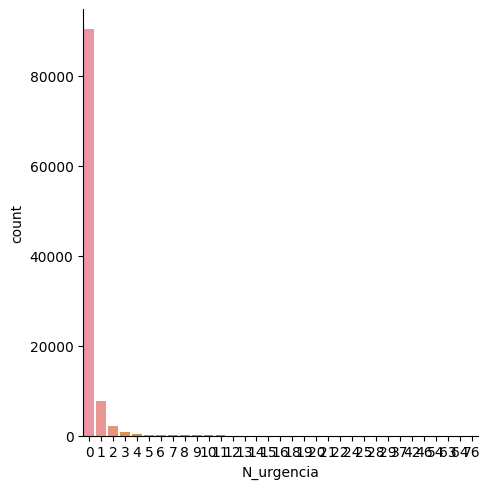

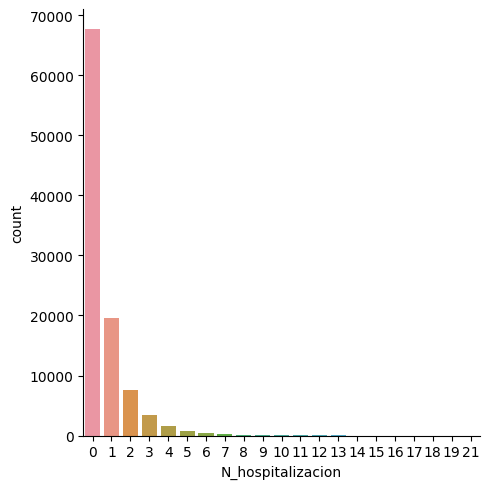

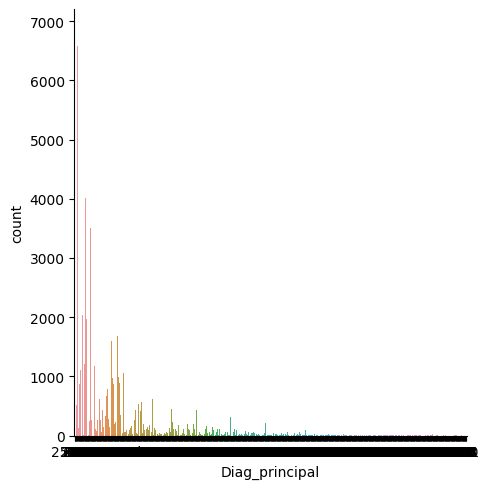

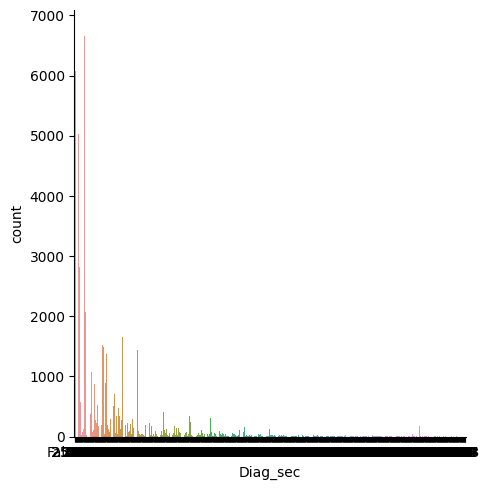

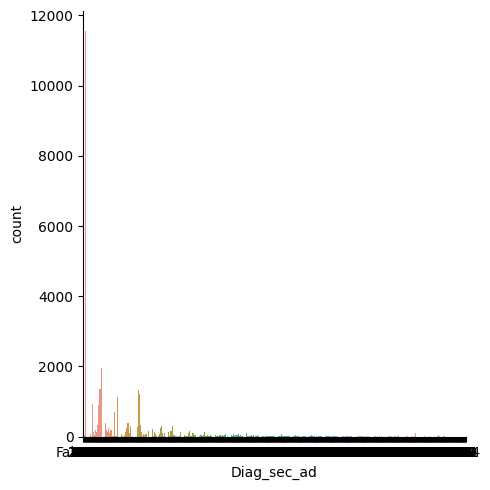

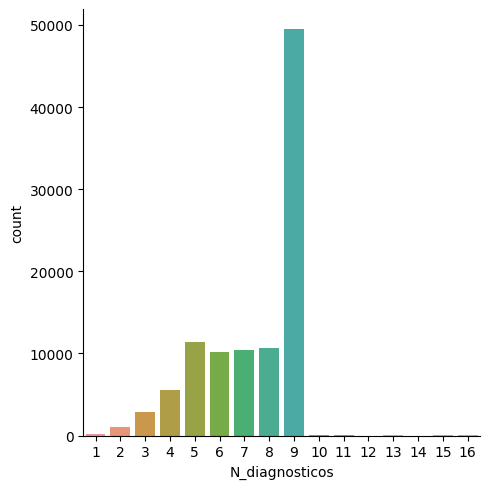

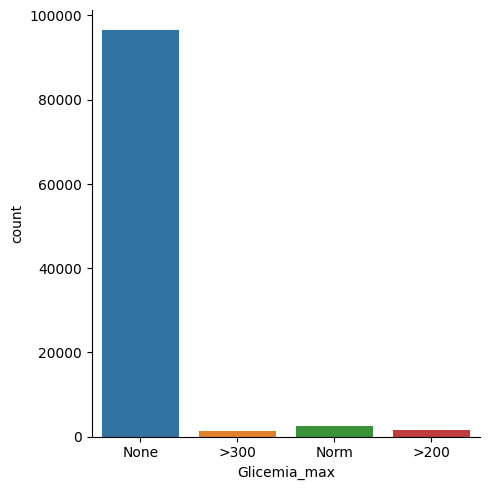

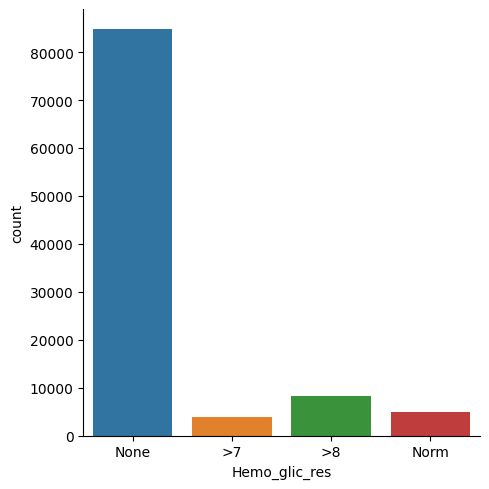

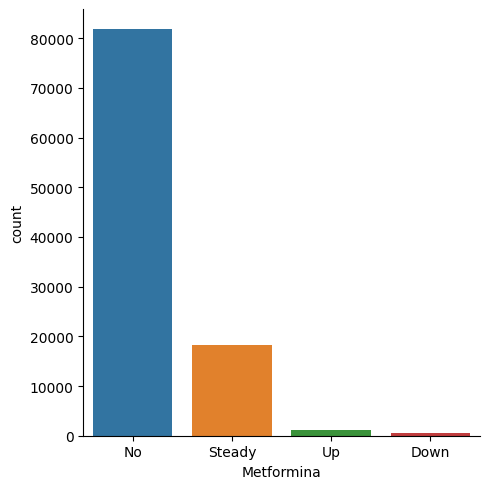

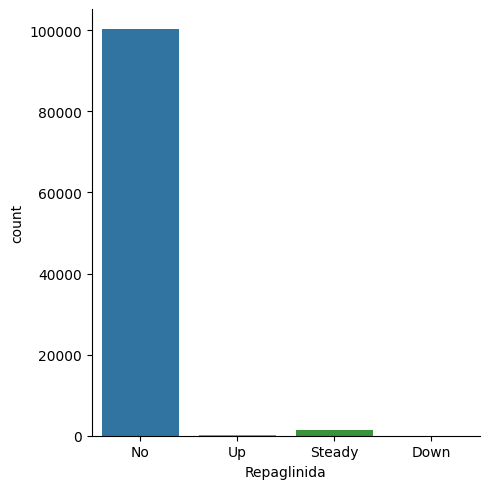

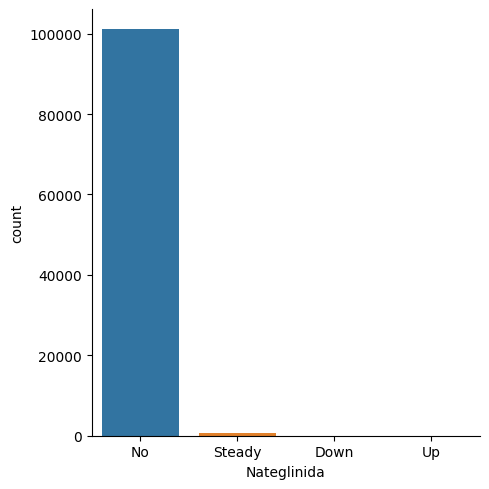

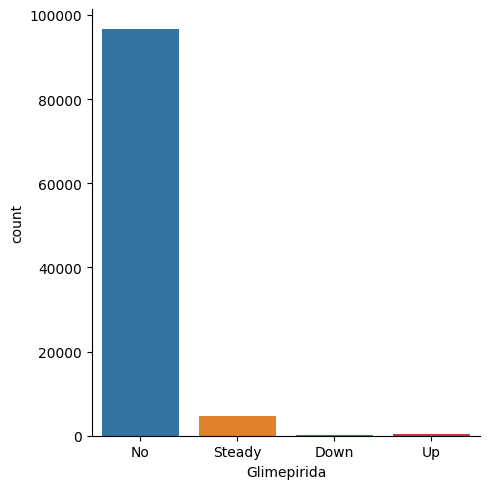

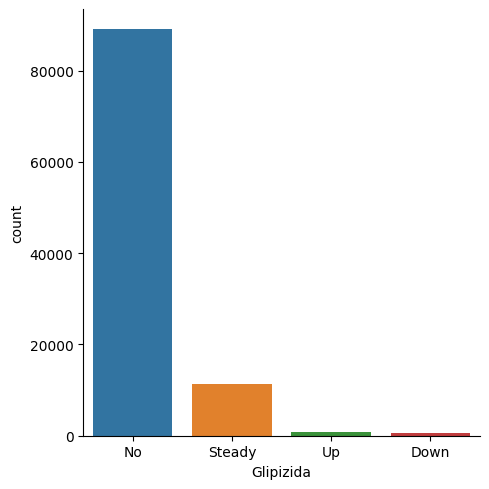

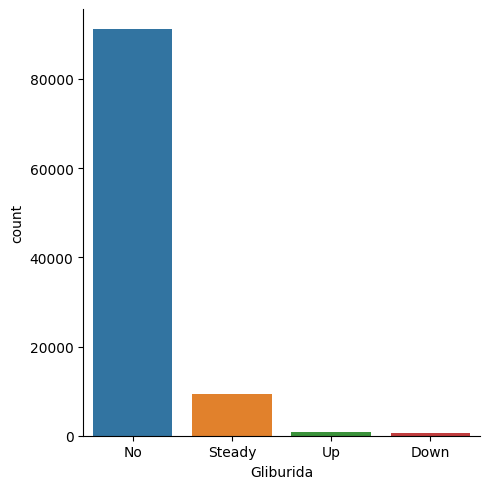

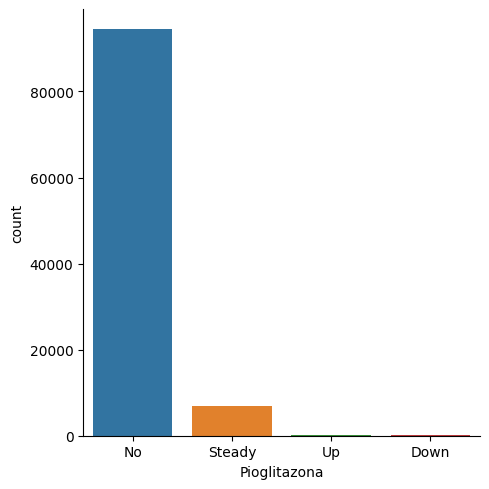

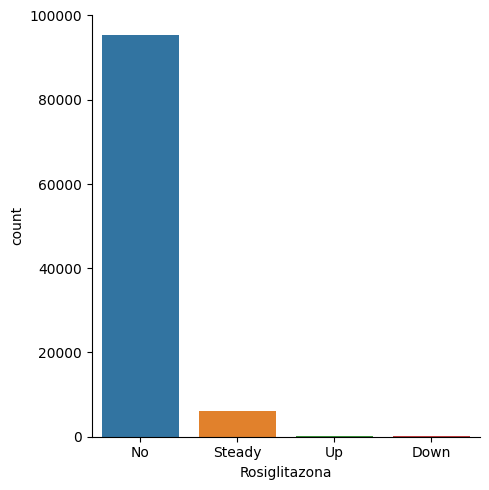

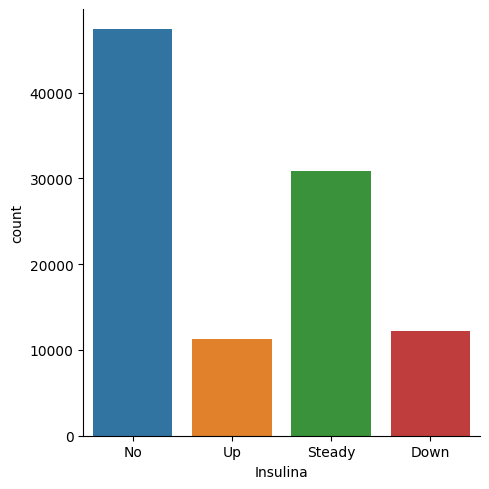

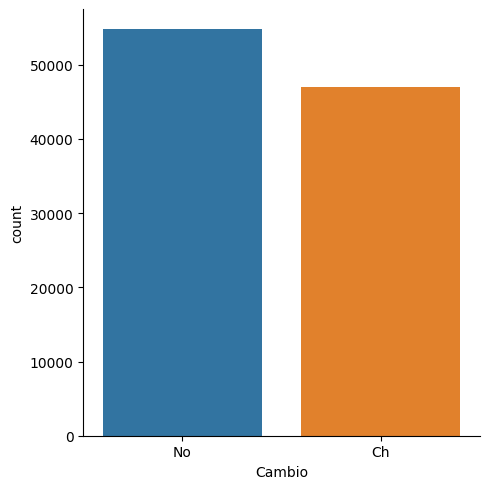

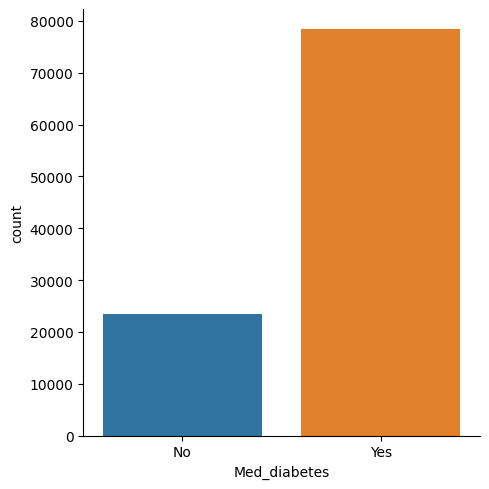

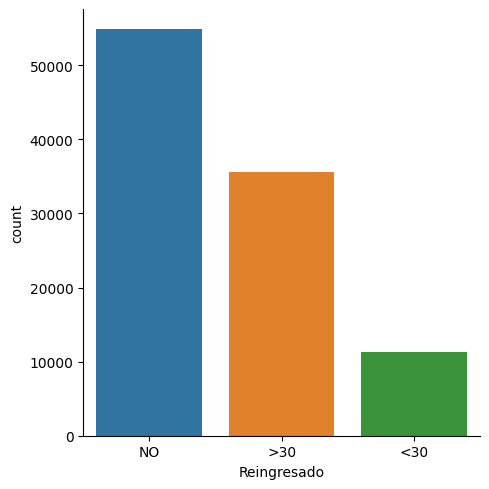

In [35]:
# Graficar histograma por parametro
for (label, content) in df_SinColumnas_SinFilas.iteritems():
   sns.catplot(x=label, data=df, kind='count')

In [36]:
for (label, content) in df_SinColumnas_SinFilas.iteritems():
    print('Valores únicos en la columna', label,':',  df_SinColumnas_SinFilas[label].nunique())
    print(label,':',  df_SinColumnas_SinFilas[label].unique())
    print(df_SinColumnas_SinFilas[label].value_counts())
    print('-'*100)

<ipython-input-36-f8413c8d789d>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in df_SinColumnas_SinFilas.iteritems(): # solo se ocupará el label (nombre de la columna)


Valores únicos en la columna Raza : 6
Raza : ['Caucasian' 'AfricanAmerican' 'Faltante' 'Other' 'Asian' 'Hispanic']
Caucasian          74220
AfricanAmerican    18772
Faltante            2234
Hispanic            2017
Other               1472
Asian                628
Name: Raza, dtype: int64
----------------------------------------------------------------------------------------------------
Valores únicos en la columna Genero : 3
Genero : ['Female' 'Male' 'Unknown/Invalid']
Female             53454
Male               45886
Unknown/Invalid        3
Name: Genero, dtype: int64
----------------------------------------------------------------------------------------------------
Valores únicos en la columna Edad : 10
Edad : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
[70-80)     25331
[60-70)     22059
[50-60)     17060
[80-90)     16434
[40-50)      9607
[30-40)      3764
[90-100)     2589
[20-30)      1649
[10-20)       690
[0-10)    

In [37]:
df_SinColumnas_SinFilas.head(10)

,Raza,Genero,Edad,ID_tipo_admision,ID_alta,ID_fuente_admision,Tiempo_hospitalizacion,Especialidad_medica,N_procedimientos_lab,N_procedimientos,...,Nateglinida,Glimepirida,Glipizida,Gliburida,Pioglitazona,Rosiglitazona,Insulina,Cambio,Med_diabetes,Reingresado
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,Faltante,59,0,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,Faltante,11,5,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,Faltante,44,1,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,Faltante,51,0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,Faltante,31,6,...,No,No,No,No,No,No,Steady,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,Faltante,70,1,...,No,Steady,No,No,No,No,Steady,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,Faltante,73,0,...,No,No,No,Steady,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,Faltante,68,2,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,3,...,No,No,No,No,No,Steady,Steady,Ch,Yes,NO


In [38]:
from sklearn.preprocessing import OrdinalEncoder

# Crear el codificador indicando el orden de la variables
encoder = OrdinalEncoder(categories=[['Caucasian', 'AfricanAmerican', 'Faltante', 'Other', 'Asian', 'Hispanic']])
# Ajustar el codificador con la variable y se transforma
encoder.fit(df_SinColumnas_SinFilas[["Raza"]])
df_SinColumnas_SinFilas["Raza"] = encoder.transform(df_SinColumnas_SinFilas[["Raza"]])

encoder = OrdinalEncoder(categories=[['Female', 'Male', 'Unknown/Invalid']])
encoder.fit(df_SinColumnas_SinFilas[["Genero"]])
df_SinColumnas_SinFilas["Genero"] = encoder.transform(df_SinColumnas_SinFilas[["Genero"]])


encoder = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)','[70-80)', '[80-90)', '[90-100)' ]])
encoder.fit(df_SinColumnas_SinFilas[["Edad"]])
df_SinColumnas_SinFilas["Edad"] = encoder.transform(df_SinColumnas_SinFilas[["Edad"]])

encoder = OrdinalEncoder(categories=[['Pediatrics-Endocrinology', 'Faltante', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRehabilitation', 'InfectiousDiseases',
       'Anesthesiology', 'Rheumatology', 'AllergyandImmunology',
       'Surgery-Maxillofacial', 'Pediatrics-InfectiousDiseases',
       'Pediatrics-AllergyandImmunology', 'Dentistry', 'Surgeon',
       'Surgery-Vascular', 'Osteopath', 'Psychiatry-Addictive',
       'Surgery-Cardiovascular', 'PhysicianNotFound', 'Hematology',
       'Proctology', 'Obstetrics', 'SurgicalSpecialty', 'Radiologist',
       'Pathology', 'Dermatology', 'SportsMedicine', 'Speech',
       'Hospitalist', 'OutreachServices', 'Cardiology-Pediatric',
       'Perinatology', 'Neurophysiology', 'Endocrinology-Metabolism',
       'DCPTEAM', 'Resident']])

encoder.fit(df_SinColumnas_SinFilas[["Especialidad_medica"]])
df_SinColumnas_SinFilas["Especialidad_medica"] = encoder.transform(df_SinColumnas_SinFilas[["Especialidad_medica"]])

<ipython-input-38-a7004f4e3696>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Raza"] = encoder.transform(df_SinColumnas_SinFilas[["Raza"]])
<ipython-input-38-a7004f4e3696>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Genero"] = encoder.transform(df_SinColumnas_SinFilas[["Genero"]])
<ipython-input-38-a7004f4e3696>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [39]:

encoder = OrdinalEncoder(categories=[['Faltante', '250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '626', '295', '196', '250.6',
       '618', '182', '845', '423', '808', '250.4', '722', '250.11', '784',
       '707', '440', '151', '715', '198', '564', '812', '997', '403',
       '38', '590', '556', '578', '250.32', '433', 'V58', '569', '185',
       '536', '255', '250.13', '599', '558', '574', '491', '560', '244',
       '250.03', '577', '730', '188', '824', '250.8', '332', '562', '291',
       '296', '510', '401', '263', '438', '70', '250.02', '493', '642',
       '625', '571', '738', '593', '250.42', '807', '456', '446', '575',
       '250.41', '820', '515', '780', '250.22', '995', '235', '250.82',
       '721', '787', '724', '282', '514', 'V55', '281', '250.33', '530',
       '466', '435', '250.12', 'V53', '789', '566', '822', '191', '557',
       '432', '733', '162', '455', '711', '482', '202', '280', '553',
       '225', '154', '441', '250.81', '349', 'faltante', '962', '592',
       '507', '386', '156', '200', '728', '348', '459', '426', '388',
       '607', '337', '82', '531', '596', '288', '656', '573', '492',
       '220', '516', '210', '922', '286', '885', '958', '661', '969',
       '250.93', '227', '112', '404', '823', '532', '416', '346', '535',
       '453', '250', '595', '211', '303', '250.01', '852', '218', '782',
       '540', '457', '285', '340', '54', '351', '601', '723', '555',
       '153', '443', '380', '424', '241', '358', '694', '331', '345',
       '681', '447', '290', '158', '579', '436', '335', '309', '654',
       '805', '799', '292', '183', '78', '851', '431', '458', '586',
       '311', '892', '305', '293', '415', '591', '794', '79', '655',
       '429', '278', '658', '598', '729', '585', '444', '604', '727',
       '214', '552', '284', '680', '708', '41', '644', '481', '821',
       '413', '437', '968', '756', '632', '359', '275', '512', '781',
       '420', '368', '522', '294', '825', '135', '304', '320', '250.31',
       '669', '868', '496', '250.43', '826', '567', '3', '203', '53',
       '251', '565', '161', '495', '49', '250.1', '297', '663', '576',
       '355', '850', '287', '250.2', '611', '840', '350', '726', '537',
       '620', '180', '366', '783', '11', '751', '716', '250.3', '199',
       '464', '580', '836', '664', '283', '813', '966', '289', '965',
       '184', '480', '608', '333', '972', '212', '117', '788', '924',
       '959', '621', '238', '785', '714', '942', '250.23', '710', '47',
       '933', '508', '478', '844', '7', '736', '233', '42', '250.5',
       '397', '395', '201', '421', '253', '250.92', '600', '494', '977',
       '39', '659', '312', '614', '647', '652', '646', '274', '861',
       '425', '527', '451', '485', '217', '250.53', '442', '970', '193',
       '160', '322', '581', '475', '623', '374', '582', '568', '465',
       '801', '237', '376', '150', '461', '913', '226', '617', '987',
       '641', '298', '550', '336', '362', '228', '513', '383', '746',
       '353', '911', '506', '873', '155', '860', '534', '802', '141',
       'V45', '396', '310', '341', '242', '719', '239', '533', '616',
       '519', '301', 'V66', '5', '989', '230', '385', '300', '853', '871',
       '570', '848', '463', '9', '790', '250.21', '236', '361', '594',
       '501', '810', '643', '430', '528', '205', '791', '983', '992',
       '490', '172', '171', '622', '306', '863', '864', '474', '660',
       '759', '204', '356', '634', '967', '551', '695', '187', '732',
       '747', '323', '308', '370', '252', '152', '846', '365', '718',
       '48', '266', '720', '94', '344', '797', '170', '878', '904', 'V56',
       '882', '843', '709', '973', '454', '686', '939', '487', '229',
       '991', '483', '357', '692', '796', '693', '935', '936', '800',
       '920', 'V26', '261', '307', '262', '250.9', '831', '145', '223',
       'V71', '839', '685', 'V54', '35', '34', '179', '964', '136', '324',
       '389', '815', '334', '143', '526', '588', '192', 'V67', '394',
       '917', '88', '219', '325', '792', '717', '994', '990', '793',
       '207', '637', '195', '373', '847', '827', '164', '31', '891',
       '814', 'V60', '703', '865', '352', '627', '378', '342', '886',
       '369', '745', '705', '816', '934', '541', '986', '610', '633',
       '640', '753', '173', '835', '379', '445', '272', '382', '945',
       '619', '881', '250.52', '866', '405', '916', '215', '893', '75',
       '671', '928', '906', '897', '725', '867', '115', '890', '734',
       '521', '674', '470', '834', '146', '696', '524', '980', '691',
       '384', '142', '879', '250.51', '246', '448', '955', '653', '149',
       '245', '735', '883', '854', '952', '838', '194', 'V43', '163',
       '216', '147', '354', '27', '477', '318', '880', '921', '377',
       '471', '683', '175', '602', '250.91', '982', '706', '375', '417',
       '131', '347', '870', '148', '862', '61', '817', '914', '360',
       '684', '314', 'V63', '36', '57', '240', '208', '915', '971', '795',
       '988', '452', '327', '731', '842', 'V25', '645', '803', '665',
       '110', '944', '603', '923', '412', '363', '957', '976', '698',
       '299', '700', '273', '974', '97', '529', '66', '98', '605', '941',
       '52', '84', '271', '837', '657', '895', '338', '523', '806', '542',
       '114', '543', '372', 'V70', 'E909', '583', 'V07', '422', '963',
       '615', '279', '500', '903', '919', '875', '381', '704', '23', '58',
       '649', '832', '133', '975', '833', '391', '690', '10', 'V51']])

encoder.fit(df_SinColumnas_SinFilas[["Diag_principal"]])
df_SinColumnas_SinFilas["Diag_principal"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_principal"]])

<ipython-input-39-1546e513f8ba>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Diag_principal"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_principal"]])


In [40]:
df_SinColumnas_SinFilas.Diag_sec.unique()

array(['Faltante', '250.01', '250', '250.43', '157', '411', '492', '427',
       '198', '403', '288', '998', '507', '174', '425', '456', '401',
       '715', '496', '428', '585', '250.02', '410', '999', '996', '135',
       '244', '41', '571', '276', '599', '424', '491', '553', '707',
       '997', '286', '440', '493', '242', '70', 'V45', '250.03', '357',
       '511', '196', '396', '197', '414', '250.52', '577', '535', '413',
       '285', '53', '780', '518', '150', '566', '250.6', '867', '486',
       'V15', '8', '788', '340', '574', '581', '228', '530', '250.82',
       '786', '294', '567', '785', '512', '305', '729', '250.51', '280',
       '648', '560', '618', '444', '38', 'V10', '578', '277', '781',
       '250.42', '278', '426', '584', '462', '402', '153', '272', '733',
       '34', '881', '203', '250.41', '250.13', '293', '245', '250.12',
       '558', '787', '342', '573', '626', '303', '250.53', '458', '710',
       '415', 'V42', '284', '569', '759', '682', '112', '292', '435'

In [41]:
df_SinColumnas_SinFilas.Diag_sec_ad.unique()

array(['Faltante', '255', 'V27', '403', '250', 'V45', '38', '486', '996',
       '197', '250.6', '427', '627', '414', '416', '714', '428', '582',
       'V43', '250.01', '263', '250.42', '276', '482', '401', '250.41',
       '585', '781', '278', '998', '568', '682', '618', '250.02', '305',
       '707', '496', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '599', '250.7', '250.52',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '461',
       '535', '787', '891', '284', '458', '648', '780', '182', '285',
       '593', '413', '664', '564', '201', '356', 'V15', '292', '1

In [42]:

encoder = OrdinalEncoder(categories=[['Faltante', '250.01', '250', '250.43', '157', '411', '492', '427',
       '198', '403', '288', '998', '507', '174', '425', '456', '401',
       '715', '496', '428', '585', '250.02', '410', '999', '996', '135',
       '244', '41', '571', '276', '599', '424', '491', '553', '707',
       '997', '286', '440', '493', '242', '70', 'V45', '250.03', '357',
       '511', '196', '396', '197', '414', '250.52', '577', '535', '413',
       '285', '53', '780', '518', '150', '566', '250.6', '867', '486',
       'V15', '8', '788', '340', '574', '581', '228', '530', '250.82',
       '786', '294', '567', '785', '512', '305', '729', '250.51', '280',
       '648', '560', '618', '444', '38', 'V10', '578', '277', '781',
       '250.42', '278', '426', '584', '462', '402', '153', '272', '733',
       '34', '881', '203', '250.41', '250.13', '293', '245', '250.12',
       '558', '787', '342', '573', '626', '303', '250.53', '458', '710',
       '415', 'V42', '284', '569', '759', '682', '112', '292', '435',
       '290', '250.93', '642', '536', '398', '319', '711', 'E878', '446',
       '255', 'V44', '250.7', '784', '300', '562', '162', '287', '447',
       '789', '790', '591', '200', '154', '304', '117', '847', '852',
       '250.83', '250.11', '816', '575', '416', '412', '441', '515',
       '372', '482', '382', 'V65', '572', '283', '78', '250.81', '576',
       '595', '295', 'V12', '204', '466', '721', '434', '590', '271',
       '813', '368', '227', '783', '250.5', '258', '253', '309', '250.91',
       '519', '333', '459', '250.92', '250.4', '179', '420', '345', '433',
       '661', '537', '205', '722', '405', '437', '714', '211', '263',
       '202', '397', '250.23', 'E932', '301', '723', '614', '568', '861',
       'V57', '724', '189', '297', '453', 'E888', '730', '354', '201',
       '451', '738', 'E939', '805', 'V43', '155', '910', '218', '358',
       '220', 'E937', '583', '958', '794', '564', '250.22', '620', '621',
       '331', '617', '596', '314', '378', '250.8', '625', '478', '731',
       '172', '404', '681', '470', '279', '281', '531', '443', '799',
       '436', '337', '311', '719', 'E944', '423', 'E870', '465', 'E849',
       '782', '481', '480', 'V23', '199', '79', '438', '348', '42',
       'E950', '473', '627', '726', '54', '490', '317', '332', '508',
       '369', '600', '349', '485', '922', '431', '296', 'E934', '753',
       'E935', '386', '728', '607', 'E915', '344', '716', '289', '191',
       '873', '850', '611', '377', '352', '616', 'V17', '136', '455',
       '933', 'E885', '860', '513', '603', '484', '223', 'V72', '291',
       '151', 'V58', '550', '510', '891', '592', '791', '138', '598',
       '336', '362', '217', '825', '298', '821', 'E880', '343', '429',
       'E879', '579', '225', '250.9', 'V49', '696', '233', '185', '658',
       '969', '275', '250.1', '601', '704', '808', 'E890', 'V18', '920',
       '380', '570', 'E817', '359', '812', '274', 'V14', '324', '758',
       'V66', '911', 'E931', 'E924', '593', '792', '727', 'V46', '394',
       '532', 'V64', '557', '864', '718', 'E942', '807', '604', '924',
       '820', '580', '273', '241', '282', '824', 'V61', '646', '701',
       '736', '565', '383', '250.2', 'E947', '872', '905', 'E930', '921',
       '131', '448', '389', '421', '214', '705', '494', '752', '623', '9',
       '299', '959', '365', '967', 'E858', '40', '691', '432', '909', '5',
       '814', '746', '250.31', '556', '680', '745', '351', '306', '110',
       '695', '552', '346', '918', '882', '947', '520', '188', '31',
       '356', '737', 'V08', '322', '182', '517', '974', 'E929', 'V53',
       '912', '252', '608', '516', 'E933', '94', '702', '923', '594',
       '647', '111', '934', '430', '487', '709', '796', '156', 'E812',
       '977', '915', '756', '840', '341', '259', '693', '725', 'V62',
       '528', '683', '953', '457', '501', 'E900', 'V09', '522', '919',
       '461', '506', '193', '483', 'E936', '717', '802', '335', 'V54',
       '452', '320', '945', '906', '239', '454', '826', '823', 'E941',
       '226', '795', '684', '844', '250.33', '308', '615', '588', '712',
       '663', '706', '833', '741', '713', '533', 'E884', '586', '555',
       '755', 'E928', '742', '869', '962', 'V11', '543', '208', '373',
       '870', '913', '152', '810', '965', '907', '908', '995', '845',
       '474', '442', '751', '323', '472', '464', '686', '250.32', '540',
       '251', '811', '652', '659', '851', '422', '815', '307', '325',
       '463', '992', '692', '521', '917', 'E965', '524', '916', 'E813',
       '173', '238', '137', '312', '837', '355', '980', '622', '475',
       '500', '754', '261', '801', '868', '968', '381', '11', '250.21',
       '694', '610', '734', 'E814', '310', '246', '892', '846', '634',
       '75', 'E927', 'E905', '183', '379', 'E917', '163', '514', 'E868',
       '495', '747', '989', 'E854', '240', '832', '605', '602', '644',
       'V16', '35', 'V70', '376', '266', 'E918', '619', '477', '656',
       '46', '883', '171', 'V13', '698', '842', 'E850', '800', '269',
       '664', 'E887', '952', '164', 'E881', '527', '685', '366', '836',
       '27', 'V63', '865', '793', '232', '990', '52', '831', '327', '542',
       '972', '862', 'E829', 'E919', '944', 'E916', '963', '316', '645',
       '347', 'V85', '374', 'V02', '748', '256', '186', '866', '975',
       '96', '395', '262', 'E819', '654', '994', '318', 'E826', '879',
       '674', '641', '822', '145', '797', '353', 'E938', 'E816', '948',
       '987', '99', '192', '250.3', 'E906', '534', '115', 'E818', 'E980',
       '360', '338', '529', '871', '750', '212', '806', '302', '955',
       '141', '88', 'V25', '215', '350', 'V50', 'V03', 'E853', 'E968',
       'E882', '140', '703', '991', '893', 'E821', '235', 'V69', '670',
       '195', 'V55', '388', '268', '894', '114', '260', '7', '880', '853',
       'V86', '180', 'E945', '523', '863', '649', '270', '665', '460',
       '942', '364', '66', 'E883', '123', '884', 'V60', '843', '927']])

encoder.fit(df_SinColumnas_SinFilas[["Diag_sec"]])

encoder.fit(df_SinColumnas_SinFilas[["Diag_sec"]])
df_SinColumnas_SinFilas["Diag_sec"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_sec"]])

<ipython-input-42-a309d43d2741>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Diag_sec"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_sec"]])


In [43]:
encoder = OrdinalEncoder(categories=[['Faltante', '255', 'V27', '403', '250', 'V45', '38', '486', '996',
       '197', '250.6', '427', '627', '414', '416', '714', '428', '582',
       'V43', '250.01', '263', '250.42', '276', '482', '401', '250.41',
       '585', '781', '278', '998', '568', '682', '618', '250.02', '305',
       '707', '496', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '599', '250.7', '250.52',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '461',
       '535', '787', '891', '284', '458', '648', '780', '182', '285',
       '593', '413', '664', '564', '201', '356', 'V15', '292', '196',
       '782', '784', '473', '455', 'E932', '357', '294', '250.23', '459',
       'E878', '437', '733', '507', '525', '250.53', '397', '572', '805',
       '453', '331', '736', '402', '591', '576', '465', '533', '703',
       '349', '315', '658', '608', '578', '716', '382', '300', '282',
       '571', '536', '596', '287', '644', 'V11', '558', 'E885', '162',
       '198', '218', '412', '396', 'V14', '570', '433', 'E934', '882',
       '288', '577', '443', '729', '836', '295', '799', '281', '304',
       '153', '410', '616', '250.83', '601', '291', '75', '512', '660',
       '250.5', '598', '337', '574', '653', 'V58', '311', '386', '602',
       '790', '112', '873', '620', '436', '70', '155', '138', '663',
       '530', '710', '42', '342', '250.91', 'E884', '515', '307', '704',
       '728', '731', '583', '238', '441', '293', '573', '532', '290',
       '594', '319', '250.13', '250.12', '519', '346', '380', '135',
       '642', '698', '924', '905', 'E933', '555', '309', 'E879', '286',
       '565', '752', '580', '446', '444', '344', '252', '35', '813',
       '394', '301', '575', '258', 'V17', '802', '435', '746', 'V12',
       '709', '881', 'E935', '139', '250.81', '718', '365', '202', '334',
       '185', '398', 'V44', '517', 'E849', '614', '466', '626', '250.9',
       '368', '605', '883', '289', '478', '617', '429', '442', 'V25',
       '866', '610', '557', '959', 'E942', '94', '920', '345', '313',
       '379', '79', '516', '586', '821', '600', '242', '373', '592',
       'V64', '487', '253', '706', 'E947', '117', '340', 'E950', '656',
       'E949', '590', 'V09', '934', '694', '203', '250.93', '995', '726',
       '923', '958', '275', 'E929', '211', 'V18', '199', '665', '279',
       '522', '791', '890', '456', 'E938', 'E816', '122', '721', 'V65',
       '136', '480', '423', 'E920', '793', '647', '537', '351', '415',
       '53', '845', '336', '274', '719', '945', '434', '494', '227',
       '157', '208', '174', 'V57', '812', '734', 'V23', '447', '692',
       '228', '348', 'V16', '756', '405', 'E928', '823', '552', '528',
       '389', '240', '454', '792', '366', 'E939', '907', '270', '310',
       '266', '387', 'E931', '783', '245', '607', '355', 'E930', '705',
       '372', '369', '611', '283', 'V46', '110', '867', 'E956', '251',
       '250.2', '820', '712', '695', '567', '343', '723', 'V08', '273',
       '623', '807', '451', '495', '701', '34', 'V53', '314', '472',
       'E945', '11', '189', '534', '354', '333', 'V54', '277', '659',
       '708', '452', '655', '816', '670', '621', '246', '953', '865',
       'E817', '646', '151', '378', '78', '298', '840', '641', '521',
       '745', '619', '912', '506', 'E904', '259', 'E870', 'E980', '383',
       'V66', '204', '696', '566', '727', '47', 'E943', '358', '191',
       '965', '921', '432', '27', '150', 'E861', '758', '477', '524',
       '751', '652', '556', '825', '919', '732', '908', '951', '962',
       '685', 'E850', 'E944', '527', '341', '693', '250.1', 'V49', '860',
       '323', 'V55', '579', '508', '969', '205', '462', 'E880', '680',
       '697', '826', '200', '457', '717', '738', '742', '735', '235',
       '308', '725', '241', '824', '464', '260', '917', '239', '661',
       '892', '261', 'E883', '943', '744', '188', 'E936', '796', '318',
       '967', '350', '854', 'E905', '9', '741', 'E941', '170', '643',
       '317', '759', '909', 'V22', '831', '713', '180', '801', '360',
       '359', '501', '335', '250.11', '306', '811', '690', 'V02', '271',
       '214', '250.22', '847', '543', 'V63', '906', '842', '686', '445',
       '808', '861', 'E852', '220', 'E887', 'E858', '915', '970', '256',
       '747', '395', '243', '815', '481', '5', 'E927', '297', '299',
       '851', '864', '922', '384', 'E876', '225', '158', 'E937', '871',
       '88', '966', 'E917', 'E812', 'V62', 'E924', '604', '233', 'E916',
       '377', '797', 'V72', '172', '7', '421', '852', 'E819', '972',
       '916', '956', '3', 'E965', '173', '193', '154', '347', '862',
       '250.3', '987', '470', '262', 'E855', '161', '115', '179', '910',
       '312', '17', '460', '265', '66', '163', 'V60', '870', 'E906',
       '514', '944', '844', '417', '152', '183', '991', '216', '385',
       '164', '935', '510', '814', '850', '250.21', 'E919', '872', '195',
       '431', '597', '933', '171', '884', '156', '868', '483', 'E815',
       '542', 'V61', '853', '374', 'E881', 'E882', 'E822', '192', '754',
       '327', '523', '500', 'V85', '992', '657', '684', '603', 'E826',
       '550', '913', '376', '755', '361', '186', '720', '250.31', '674',
       '911', 'E813', '226', '365.44', 'E818', '146', '955', 'E894',
       '475', 'V13', '880', '930', 'E915', '381', '132', '353', '795',
       '893', 'V01', 'E853', '863', '540', 'E828', '430', 'E865', '148',
       'E946', '822', '879', '848', 'V86', 'V03', '338', '989', '388',
       'E966', '111', 'E922', '123', '757', 'E901', '141', '268', 'E892',
       '649', '702', '948', '223', '484', 'E886', '838', '928', '236',
       '624', '837', 'E987', 'V07', '841', '800', '622', 'E912', '463',
       'V06', 'E864', '217', '877', '391', 'E825', '952', '669', '875',
       'E900', '215', '538', '980', '834', '448', '175', '49', '876',
       '230', '57', 'E854', '14', '750', '370', '671', '971']])

encoder.fit(df_SinColumnas_SinFilas[["Diag_sec_ad"]])
df_SinColumnas_SinFilas["Diag_sec_ad"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_sec_ad"]])

<ipython-input-43-e31afbe1be4f>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Diag_sec_ad"] = encoder.transform(df_SinColumnas_SinFilas[["Diag_sec_ad"]])


In [44]:
encoder = OrdinalEncoder(categories=[['None', 'Norm', '>200', '>300']])

encoder.fit(df_SinColumnas_SinFilas[["Glicemia_max"]])
df_SinColumnas_SinFilas["Glicemia_max"] = encoder.transform(df_SinColumnas_SinFilas[["Glicemia_max"]])

<ipython-input-44-671eb501686b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Glicemia_max"] = encoder.transform(df_SinColumnas_SinFilas[["Glicemia_max"]])


In [45]:
encoder = OrdinalEncoder(categories=[['None', 'Norm', '>7', '>8']])

encoder.fit(df_SinColumnas_SinFilas[["Hemo_glic_res"]])
df_SinColumnas_SinFilas["Hemo_glic_res"] = encoder.transform(df_SinColumnas_SinFilas[["Hemo_glic_res"]])

<ipython-input-45-ec900b552920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas["Hemo_glic_res"] = encoder.transform(df_SinColumnas_SinFilas[["Hemo_glic_res"]])


In [46]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Metformina']])
df_SinColumnas_SinFilas['Metformina'] = encoder.transform(df_SinColumnas_SinFilas[['Metformina']])

<ipython-input-46-ed6a7d561c8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Metformina'] = encoder.transform(df_SinColumnas_SinFilas[['Metformina']])


In [47]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Repaglinida']])
df_SinColumnas_SinFilas['Repaglinida'] = encoder.transform(df_SinColumnas_SinFilas[['Repaglinida']])

<ipython-input-47-5eefe6f63fa4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Repaglinida'] = encoder.transform(df_SinColumnas_SinFilas[['Repaglinida']])


In [48]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Nateglinida']])
df_SinColumnas_SinFilas['Nateglinida'] = encoder.transform(df_SinColumnas_SinFilas[['Nateglinida']])

<ipython-input-48-09fdb4beba1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Nateglinida'] = encoder.transform(df_SinColumnas_SinFilas[['Nateglinida']])


In [49]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Glimepirida']])
df_SinColumnas_SinFilas['Glimepirida'] = encoder.transform(df_SinColumnas_SinFilas[['Glimepirida']])

<ipython-input-49-6170f9f81032>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Glimepirida'] = encoder.transform(df_SinColumnas_SinFilas[['Glimepirida']])


In [50]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Gliburida']])
df_SinColumnas_SinFilas['Gliburida'] = encoder.transform(df_SinColumnas_SinFilas[['Gliburida']])

<ipython-input-50-66b644a48327>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Gliburida'] = encoder.transform(df_SinColumnas_SinFilas[['Gliburida']])


In [51]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Glipizida']])
df_SinColumnas_SinFilas['Glipizida'] = encoder.transform(df_SinColumnas_SinFilas[['Glipizida']])


<ipython-input-51-cff62b14202f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Glipizida'] = encoder.transform(df_SinColumnas_SinFilas[['Glipizida']])


In [52]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Pioglitazona']])
df_SinColumnas_SinFilas['Pioglitazona'] = encoder.transform(df_SinColumnas_SinFilas[['Pioglitazona']])

<ipython-input-52-67598ed6014c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Pioglitazona'] = encoder.transform(df_SinColumnas_SinFilas[['Pioglitazona']])


In [53]:
encoder = OrdinalEncoder(categories=[['No', 'Steady', 'Up', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Rosiglitazona']])
df_SinColumnas_SinFilas['Rosiglitazona'] = encoder.transform(df_SinColumnas_SinFilas[['Rosiglitazona']])

<ipython-input-53-80670b131459>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Rosiglitazona'] = encoder.transform(df_SinColumnas_SinFilas[['Rosiglitazona']])


In [54]:
encoder = OrdinalEncoder(categories=[['No', 'Up', 'Steady', 'Down']])

encoder.fit(df_SinColumnas_SinFilas[['Insulina']])
df_SinColumnas_SinFilas['Insulina'] = encoder.transform(df_SinColumnas_SinFilas[['Insulina']])

<ipython-input-54-0a6c33d6b464>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Insulina'] = encoder.transform(df_SinColumnas_SinFilas[['Insulina']])


In [55]:
encoder = OrdinalEncoder(categories=[['No', 'Ch']])

encoder.fit(df_SinColumnas_SinFilas[['Cambio']])
df_SinColumnas_SinFilas['Cambio'] = encoder.transform(df_SinColumnas_SinFilas[['Cambio']])

<ipython-input-55-8a137cf32ba9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Cambio'] = encoder.transform(df_SinColumnas_SinFilas[['Cambio']])


In [56]:
encoder = OrdinalEncoder(categories=[['No', 'Yes']])

encoder.fit(df_SinColumnas_SinFilas[['Med_diabetes']])
df_SinColumnas_SinFilas['Med_diabetes'] = encoder.transform(df_SinColumnas_SinFilas[['Med_diabetes']])

<ipython-input-56-4e52d3f5cb5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Med_diabetes'] = encoder.transform(df_SinColumnas_SinFilas[['Med_diabetes']])


In [57]:
# Crear otro dataframe para posteriormente combinar No y >30
df_diabetes = df_SinColumnas_SinFilas

In [58]:
encoder = OrdinalEncoder(categories=[['NO', '<30', '>30']])

encoder.fit(df_SinColumnas_SinFilas[['Reingresado']])
df_SinColumnas_SinFilas['Reingresado'] = encoder.transform(df_SinColumnas_SinFilas[['Reingresado']])

<ipython-input-58-982f7a993f05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SinColumnas_SinFilas['Reingresado'] = encoder.transform(df_SinColumnas_SinFilas[['Reingresado']])


In [59]:
df_SinColumnas_SinFilas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Raza                    99343 non-null  float64
 1   Genero                  99343 non-null  float64
 2   Edad                    99343 non-null  float64
 3   ID_tipo_admision        99343 non-null  int64  
 4   ID_alta                 99343 non-null  int64  
 5   ID_fuente_admision      99343 non-null  int64  
 6   Tiempo_hospitalizacion  99343 non-null  int64  
 7   Especialidad_medica     99343 non-null  float64
 8   N_procedimientos_lab    99343 non-null  int64  
 9   N_procedimientos        99343 non-null  int64  
 10  N_medicamentos          99343 non-null  int64  
 11  N_ambulatorio           99343 non-null  int64  
 12  N_urgencia              99343 non-null  int64  
 13  N_hospitalizacion       99343 non-null  int64  
 14  Diag_principal          99343 non-nul

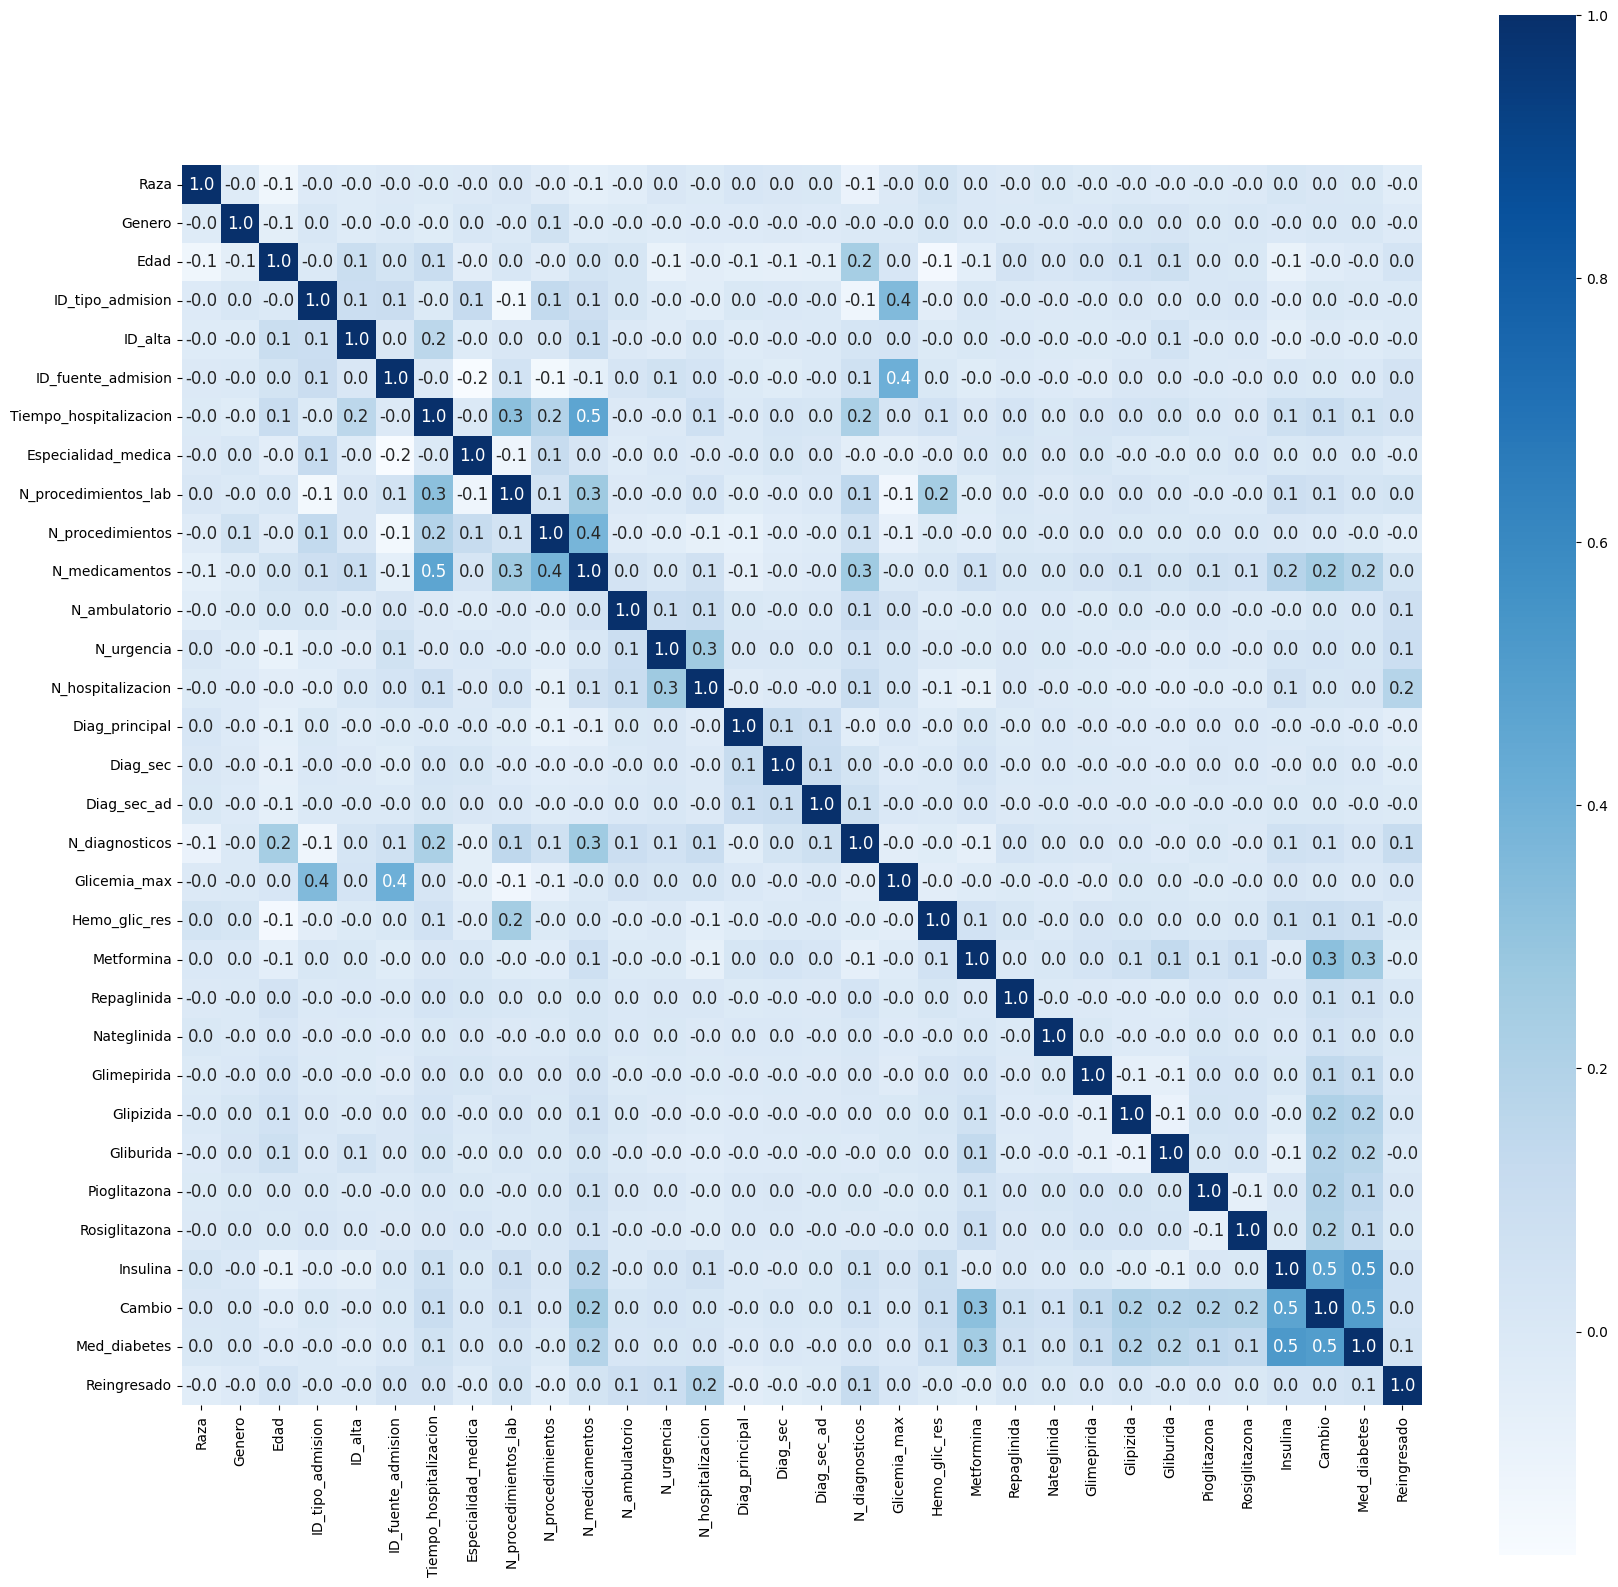

In [60]:
matriz_corr = df_SinColumnas_SinFilas.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(matriz_corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')
plt.savefig("Matriz_correlacion.jpg")

In [61]:
df_SinColumnas_SinFilas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Raza                    99343 non-null  float64
 1   Genero                  99343 non-null  float64
 2   Edad                    99343 non-null  float64
 3   ID_tipo_admision        99343 non-null  int64  
 4   ID_alta                 99343 non-null  int64  
 5   ID_fuente_admision      99343 non-null  int64  
 6   Tiempo_hospitalizacion  99343 non-null  int64  
 7   Especialidad_medica     99343 non-null  float64
 8   N_procedimientos_lab    99343 non-null  int64  
 9   N_procedimientos        99343 non-null  int64  
 10  N_medicamentos          99343 non-null  int64  
 11  N_ambulatorio           99343 non-null  int64  
 12  N_urgencia              99343 non-null  int64  
 13  N_hospitalizacion       99343 non-null  int64  
 14  Diag_principal          99343 non-nul

In [62]:
df_SinColumnas_SinFilas.Reingresado.value_counts() # datos etiquetas  desbalanceados

0.0    52527
2.0    35502
1.0    11314
Name: Reingresado, dtype: int64

In [63]:
X = df_SinColumnas_SinFilas.drop(columns=['Reingresado'])
y = df_SinColumnas_SinFilas['Reingresado']

In [64]:
# Crear conjuntos de Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # con  25% para test

In [65]:
X_train.shape, X_test.shape

((74507, 31), (24836, 31))

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74507 entries, 16333 to 63074
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Raza                    74507 non-null  float64
 1   Genero                  74507 non-null  float64
 2   Edad                    74507 non-null  float64
 3   ID_tipo_admision        74507 non-null  int64  
 4   ID_alta                 74507 non-null  int64  
 5   ID_fuente_admision      74507 non-null  int64  
 6   Tiempo_hospitalizacion  74507 non-null  int64  
 7   Especialidad_medica     74507 non-null  float64
 8   N_procedimientos_lab    74507 non-null  int64  
 9   N_procedimientos        74507 non-null  int64  
 10  N_medicamentos          74507 non-null  int64  
 11  N_ambulatorio           74507 non-null  int64  
 12  N_urgencia              74507 non-null  int64  
 13  N_hospitalizacion       74507 non-null  int64  
 14  Diag_principal          74507 non-

In [67]:
# Estandarización de escalas (de los atributos)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [68]:
X_train_sc.shape, X_test_sc.shape

((74507, 31), (24836, 31))

In [69]:
y_train.value_counts()

0.0    39470
2.0    26568
1.0     8469
Name: Reingresado, dtype: int64

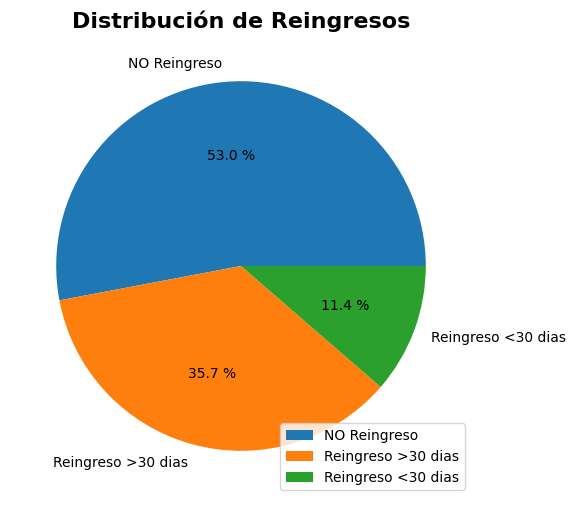

In [72]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), labels=["NO Reingreso", "Reingreso >30 dias", "Reingreso <30 dias"],autopct="%0.1f %%")
plt.title("Distribución de Reingresos",fontsize=16,color="black",fontdict = {"fontweight": "bold"})
plt.legend(loc=4)
plt.grid()
plt.show()

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

clf_gnb = GaussianNB()                                      # generar la instancia
clf_gnb = clf_gnb.fit(X_train_sc, y_train)                  # entrenar
y_hat_gnb = clf_gnb.predict(X_test_sc)                      # predecir

clf_knn = KNeighborsClassifier(n_neighbors=100)
clf_knn = clf_knn.fit(X_train_sc, y_train)
y_hat_knn = clf_knn.predict(X_test_sc)

clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train_sc, y_train)
y_hat_dt = clf_dt.predict(X_test_sc)

cld_rf = RandomForestClassifier()
cld_rf = cld_rf.fit(X_train_sc, y_train)
y_hat_rf = cld_rf.predict(X_test_sc)

acc_list = []
bacc_list = []
pre_list = []
reca_list = []
f1_list = []
for pred in [y_hat_gnb, y_hat_knn, y_hat_dt, y_hat_rf]:
    acc_list.append(accuracy_score(y_test, pred))
    bacc_list.append(balanced_accuracy_score(y_test, pred))
    pre_list.append(precision_score(y_test, pred, average='macro'))
    reca_list.append(recall_score(y_test, pred, average='macro'))
    f1_list.append(f1_score(y_test, pred, average='macro'))

# se genera un dataframe con los id de los modelos
metrics = pd.DataFrame()
models = ['Gaussian Naive Bayes', "k_NN", "Decision Tree", "Random Forest"]
metrics['Model'] = models
metrics['ACC'] = acc_list
metrics['BACC'] = bacc_list
metrics['Precision'] = pre_list
metrics['Recall'] = reca_list
metrics['F1'] = f1_list
metrics.sort_values('F1', ascending=False)

,Model,ACC,BACC,Precision,Recall,F1
3,Random Forest,0.566315,0.401704,0.480795,0.401704,0.379531
0,Gaussian Naive Bayes,0.543687,0.396036,0.439460,0.396036,0.379472
2,Decision Tree,0.464366,0.378303,0.377860,0.378303,0.378041
1,k_NN,0.558302,0.377726,0.469422,0.377726,0.336951


<Figure size 300x100 with 0 Axes>

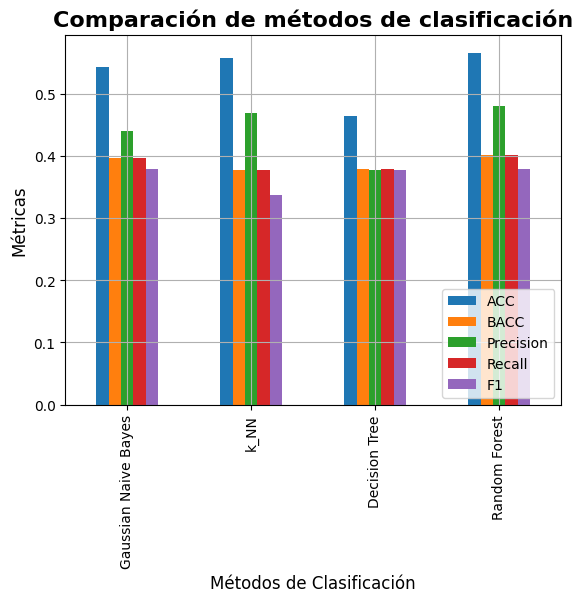

In [74]:
# Graficar comparativa de metricas por modelo
metrics=metrics.set_index("Model")
plt.figure(figsize=(3,1))
metrics.plot.bar()
plt.title("Comparación de métodos de clasificación",fontsize=16,color="black",fontdict = {"fontweight": "bold"})
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.xlabel("Métodos de Clasificación",fontsize=12)
plt.ylabel("Métricas",fontsize=12)
plt.grid()
plt.show()

In [76]:
# Balanceo de las multiclases (3 clases desbalanceadas)
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

# transformar the dataset
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

In [77]:
y_train_sm.value_counts()

0.0    39470
2.0    39470
1.0    39470
Name: Reingresado, dtype: int64

In [78]:
X_train_sm.shape

(118410, 31)

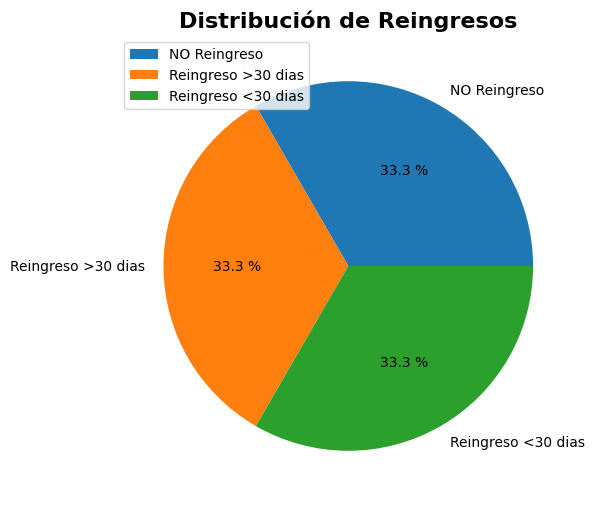

In [79]:
plt.figure(figsize=(6, 6))
plt.pie(y_train_sm.value_counts(), labels=["NO Reingreso", "Reingreso >30 dias", "Reingreso <30 dias"],autopct="%0.1f %%")
plt.title("Distribución de Reingresos",fontsize=16,color="black",fontdict = {"fontweight": "bold"})
plt.legend(loc=2)
plt.grid()
plt.show()

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf_gnb = GaussianNB()  # genero la instancia
clf_gnb = clf_gnb.fit(X_train_sm, y_train_sm) # entreno
y_hat_gnb = clf_gnb.predict(X_test_sc) # predigo

clf_knn = KNeighborsClassifier(n_neighbors=100)
clf_knn = clf_knn.fit(X_train_sm, y_train_sm)
y_hat_knn = clf_knn.predict(X_test_sc)

clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train_sm, y_train_sm)
y_hat_dt = clf_dt.predict(X_test_sc)

cld_rf = RandomForestClassifier()
cld_rf = cld_rf.fit(X_train_sm, y_train_sm)
y_hat_rf = cld_rf.predict(X_test_sc)

acc_list = []
bacc_list = []
pre_list = []
reca_list = []
f1_list = []
for pred in [y_hat_gnb, y_hat_knn, y_hat_dt, y_hat_rf]:
    acc_list.append(accuracy_score(y_test, pred))
    bacc_list.append(balanced_accuracy_score(y_test, pred))
    pre_list.append(precision_score(y_test, pred, average='macro'))
    reca_list.append(recall_score(y_test, pred, average='macro'))
    f1_list.append(f1_score(y_test, pred, average='macro'))

# se genera un dataframe con los id de los modelos
metrics = pd.DataFrame()
models = ['Gaussian Naive Bayes', "k_NN", "Decision Tree", "Random Forest"]

metrics['Model'] = models
metrics['ACC'] = acc_list
metrics['BACC'] = bacc_list
metrics['Precision'] = pre_list
metrics['Recall'] = reca_list
metrics['F1'] = f1_list
metrics.sort_values('F1', ascending=False)

,Model,ACC,BACC,Precision,Recall,F1
3,Random Forest,0.564543,0.415239,0.469362,0.415239,0.407434
2,Decision Tree,0.458890,0.376504,0.375566,0.376504,0.375832
0,Gaussian Naive Bayes,0.500725,0.411754,0.414717,0.411754,0.374540
1,k_NN,0.363545,0.407077,0.406708,0.407077,0.346618


<Figure size 300x100 with 0 Axes>

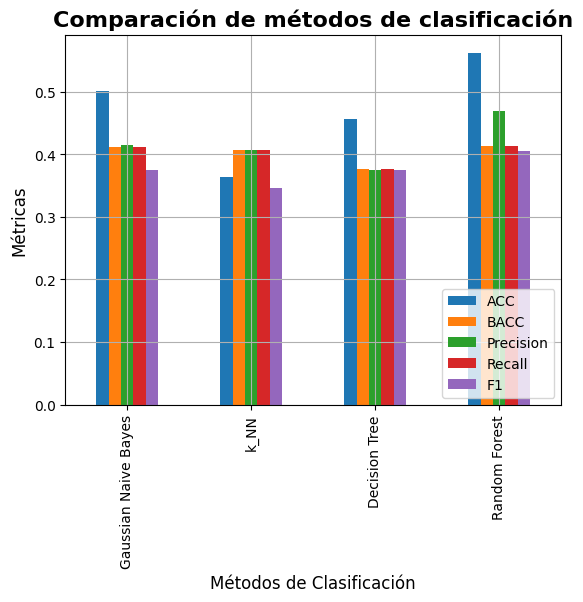

In [86]:
metrics=metrics.set_index("Model")
plt.figure(figsize=(3,1))
metrics.plot.bar()
plt.title("Comparación de métodos de clasificación",fontsize=16,color="black",fontdict = {"fontweight": "bold"})
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.xlabel("Métodos de Clasificación",fontsize=12)
plt.ylabel("Métricas",fontsize=12)
plt.grid()
plt.show()